# Pittsburgh Weather Data Analysis

This notebook analyzes Pittsburgh hourly weather normals from 1981-2010. We'll start by loading the data and exploring its structure to understand what information is available for analysis.

In [22]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (CSV or TSV)
df = pd.read_csv("Pittsburgh_hourly_normals_1981_2010.csv")
# If TSV: df = pd.read_csv("Pittsburgh_hourly_normals_1981_2010.tsv", sep="\t")

df.head()


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,HLY-CLDH-NORMAL,HLY-CLDH-NORMAL_ATTRIBUTES,HLY-CLOD-PCTBKN,HLY-CLOD-PCTBKN_ATTRIBUTES,...,HLY-WIND-2NDPCT,HLY-WIND-2NDPCT_ATTRIBUTES,HLY-WIND-AVGSPD,HLY-WIND-AVGSPD_ATTRIBUTES,HLY-WIND-PCTCLM,HLY-WIND-PCTCLM_ATTRIBUTES,HLY-WIND-VCTDIR,HLY-WIND-VCTDIR_ATTRIBUTES,HLY-WIND-VCTSPD,HLY-WIND-VCTSPD_ATTRIBUTES
0,USW00094823,01-01T00:00:00,40.4846,-80.2144,366.7,"PITTSBURGH ASOS, PA US",-7777,P,101,C,...,194,S,85,S,89,S,252,S,42,S
1,USW00094823,01-01T01:00:00,40.4846,-80.2144,366.7,"PITTSBURGH ASOS, PA US",-7777,C,86,C,...,178,C,83,C,96,C,252,C,42,C
2,USW00094823,01-01T02:00:00,40.4846,-80.2144,366.7,"PITTSBURGH ASOS, PA US",0,C,103,C,...,191,C,82,C,122,C,252,C,41,C
3,USW00094823,01-01T03:00:00,40.4846,-80.2144,366.7,"PITTSBURGH ASOS, PA US",0,C,81,C,...,194,C,80,C,122,C,251,C,40,C
4,USW00094823,01-01T04:00:00,40.4846,-80.2144,366.7,"PITTSBURGH ASOS, PA US",0,C,90,C,...,210,C,81,C,102,C,252,C,40,C


In [6]:
df.columns.tolist()

['STATION',
 'DATE',
 'LATITUDE',
 'LONGITUDE',
 'ELEVATION',
 'NAME',
 'HLY-CLDH-NORMAL',
 'HLY-CLDH-NORMAL_ATTRIBUTES',
 'HLY-CLOD-PCTBKN',
 'HLY-CLOD-PCTBKN_ATTRIBUTES',
 'HLY-CLOD-PCTCLR',
 'HLY-CLOD-PCTCLR_ATTRIBUTES',
 'HLY-CLOD-PCTFEW',
 'HLY-CLOD-PCTFEW_ATTRIBUTES',
 'HLY-CLOD-PCTOVC',
 'HLY-CLOD-PCTOVC_ATTRIBUTES',
 'HLY-CLOD-PCTSCT',
 'HLY-CLOD-PCTSCT_ATTRIBUTES',
 'HLY-DEWP-10PCTL',
 'HLY-DEWP-10PCTL_ATTRIBUTES',
 'HLY-DEWP-90PCTL',
 'HLY-DEWP-90PCTL_ATTRIBUTES',
 'HLY-DEWP-NORMAL',
 'HLY-DEWP-NORMAL_ATTRIBUTES',
 'HLY-HIDX-NORMAL',
 'HLY-HIDX-NORMAL_ATTRIBUTES',
 'HLY-HTDH-NORMAL',
 'HLY-HTDH-NORMAL_ATTRIBUTES',
 'HLY-PRES-10PCTL',
 'HLY-PRES-10PCTL_ATTRIBUTES',
 'HLY-PRES-90PCTL',
 'HLY-PRES-90PCTL_ATTRIBUTES',
 'HLY-PRES-NORMAL',
 'HLY-PRES-NORMAL_ATTRIBUTES',
 'HLY-TEMP-10PCTL',
 'HLY-TEMP-10PCTL_ATTRIBUTES',
 'HLY-TEMP-90PCTL',
 'HLY-TEMP-90PCTL_ATTRIBUTES',
 'HLY-TEMP-NORMAL',
 'HLY-TEMP-NORMAL_ATTRIBUTES',
 'HLY-WCHL-NORMAL',
 'HLY-WCHL-NORMAL_ATTRIBUTES',
 'HLY-WIND-

In [10]:
df.filter(like="TEMP").head()
df.filter(like="PRCP").head()

""
0
1
2
3
4


In [23]:
df["DATE"] = pd.to_datetime("2000-" + df["DATE"].astype(str), errors="coerce")
df["Month"] = df["DATE"].dt.month
df["Hour"] = df["DATE"].dt.hour

In [24]:
monthly_temps = df.groupby("Month")["HLY-TEMP-NORMAL"].mean()
monthly_dewp  = df.groupby("Month")["HLY-DEWP-NORMAL"].mean()
monthly_wind  = df.groupby("Month")["HLY-WIND-VCTSPD"].mean()

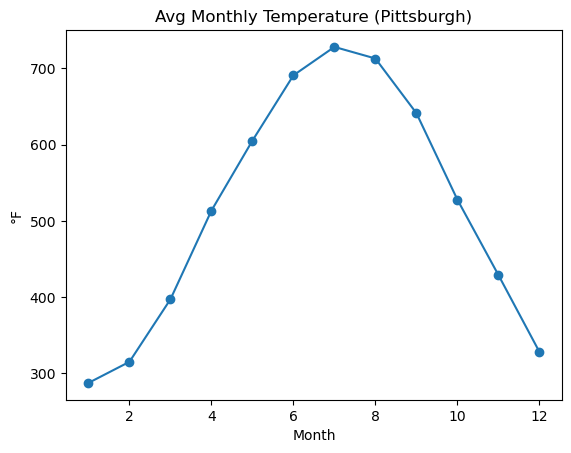

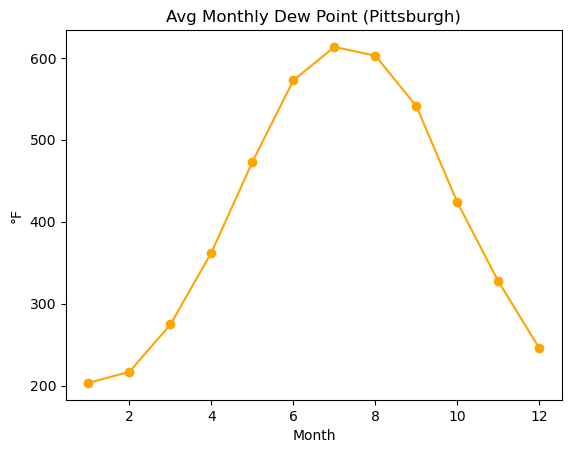

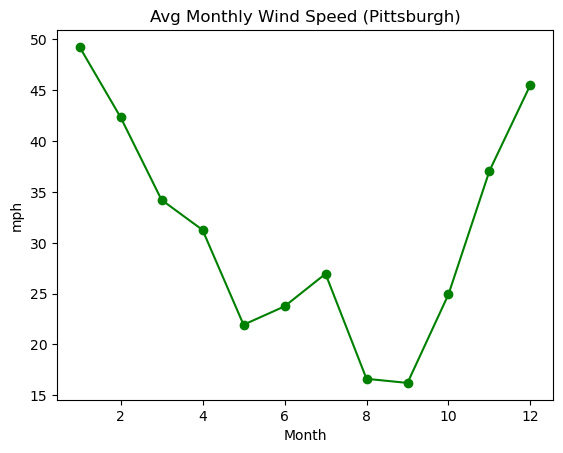

In [25]:
import matplotlib.pyplot as plt

monthly_temps.plot(marker="o", title="Avg Monthly Temperature (Pittsburgh)")
plt.ylabel("°F")
plt.show()

monthly_dewp.plot(marker="o", color="orange", title="Avg Monthly Dew Point (Pittsburgh)")
plt.ylabel("°F")
plt.show()

monthly_wind.plot(marker="o", color="green", title="Avg Monthly Wind Speed (Pittsburgh)")
plt.ylabel("mph")
plt.show()

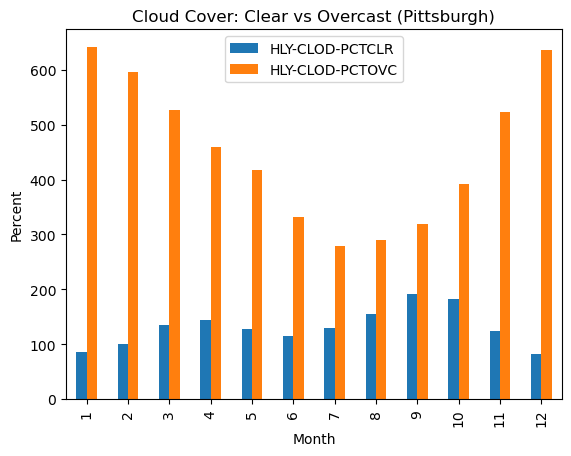

In [26]:
# Step 6: Cloud Cover Example
cloud_cover = df.groupby("Month")[["HLY-CLOD-PCTCLR", "HLY-CLOD-PCTOVC"]].mean()

cloud_cover.plot(kind="bar", title="Cloud Cover: Clear vs Overcast (Pittsburgh)")
plt.ylabel("Percent")
plt.show()

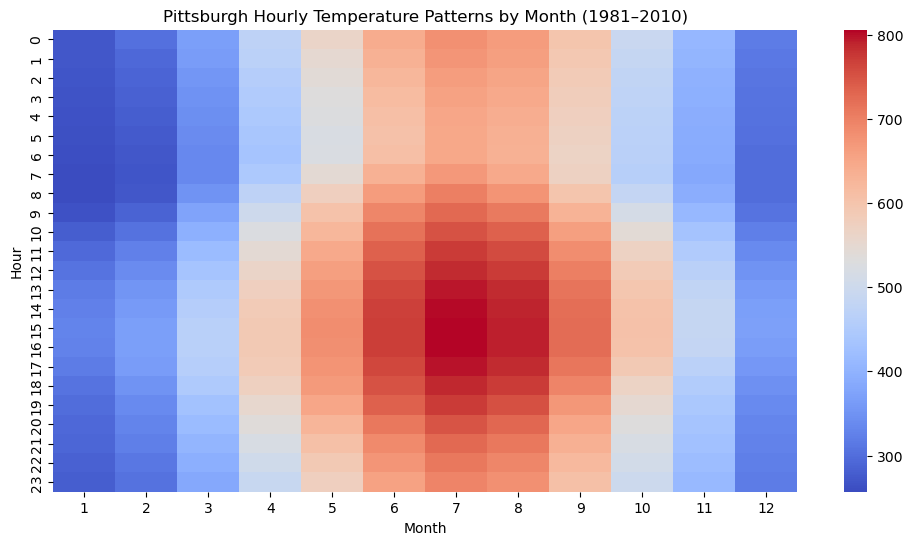

In [27]:
heatmap_data = df.pivot_table(values="HLY-TEMP-NORMAL", index="Hour", columns="Month")

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="coolwarm")
plt.title("Pittsburgh Hourly Temperature Patterns by Month (1981–2010)")
plt.show()